<a href="https://colab.research.google.com/github/Ahadri94/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS18_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [30]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-09 16:23:03--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.9.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.9.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  66.9MB/s    in 2.9s    

2020-07-09 16:23:06 (66.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [31]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [33]:
%cd instacart_2017_05_01

[Errno 2] No such file or directory: 'instacart_2017_05_01'
/content/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01


In [34]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [59]:
##### YOUR CODE HERE #####
df1 = pd.DataFrame({'Banana': [1,2,3,4], 'Bag_of_Organic_Bananas': [4,5,6,7], 'Organic_Strawberries': [7,8,9,10]})

df2 = pd.DataFrame({'Organic_Baby_Spinach': [6,4,8,7], 'Organic_Hass_Avocado': [9,4,3,2], 'Large_Lemon': [1,6,2,9]})


In [58]:
df1.head()

,Banana,Bag_of_Organic_Bananas,Organic_Strawberries
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [60]:
df2.head()

,Organic_Baby_Spinach,Organic_Hass_Avocado,Large_Lemon
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [61]:
by_rows = pd.concat([df1,df2])

by_rows

,Banana,Bag_of_Organic_Bananas,Organic_Strawberries,Organic_Baby_Spinach,Organic_Hass_Avocado,Large_Lemon
0,1.0,4.0,7.0,NaN,NaN,NaN
1,2.0,5.0,8.0,NaN,NaN,NaN
2,3.0,6.0,9.0,NaN,NaN,NaN
3,4.0,7.0,10.0,NaN,NaN,NaN
0,NaN,NaN,NaN,6.0,9.0,1.0
1,NaN,NaN,NaN,4.0,4.0,6.0
2,NaN,NaN,NaN,8.0,3.0,2.0
3,NaN,NaN,NaN,7.0,2.0,9.0


In [25]:
by_cols = pd.concat([df1,df2], axis=1)

by_cols

,Banana,Bag_of_Organic_Bananas,Organic_Strawberries,Organic_Baby_Spinach,Organic_Hass_Avocado,Large_Lemon
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [26]:
by_rows.reset_index()

,index,Banana,Bag_of_Organic_Bananas,Organic_Strawberries,Organic_Baby_Spinach,Organic_Hass_Avocado,Large_Lemon
0,0,1.0,4.0,7.0,NaN,NaN,NaN
1,1,2.0,5.0,8.0,NaN,NaN,NaN
2,2,3.0,6.0,9.0,NaN,NaN,NaN
3,3,4.0,7.0,10.0,NaN,NaN,NaN
4,0,NaN,NaN,NaN,6.0,9.0,1.0
5,1,NaN,NaN,NaN,4.0,4.0,6.0
6,2,NaN,NaN,NaN,8.0,3.0,2.0
7,3,NaN,NaN,NaN,7.0,2.0,9.0


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [41]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [42]:
table2.head()

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [43]:
# table2 -> tidy
table2 = table2.reset_index() 

In [48]:
# tidy -> table2
tidy = table2.melt(id_vars='index',value_vars=['John Smith','Jane Doe', 'Mary Johnson'])

print(tidy)

        index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0


In [54]:
flights = sns.load_dataset('flights')
print(flights)

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]


In [55]:
# Flights Pivot Table
flights_pivot = flights.pivot_table(index='year', columns='month', values='passengers')
print(flights_pivot)
flights_pivot.shape

month  January  February  March  April  ...  September  October  November  December
year                                    ...                                        
1949       112       118    132    129  ...        136      119       104       118
1950       115       126    141    135  ...        158      133       114       140
1951       145       150    178    163  ...        184      162       146       166
1952       171       180    193    181  ...        209      191       172       194
1953       196       196    236    235  ...        237      211       180       201
1954       204       188    235    227  ...        259      229       203       229
1955       242       233    267    269  ...        312      274       237       278
1956       284       277    317    313  ...        355      306       271       306
1957       315       301    356    348  ...        404      347       305       336
1958       340       318    362    348  ...        404      359       310   

(12, 12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


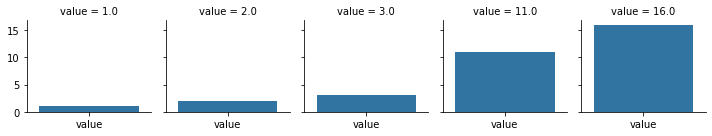

In [50]:
import seaborn as sns
sns.catplot(col='value', 
            kind='bar', data=tidy, height=2);


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####